# Introducing Scikit-Learn & Linear Regression Intro

**[Scikit-Learn](http://scikit-learn.org)** is an open-source machine learning library for Python that provides simple and efficient tools for data mining, data analysis, and machine learning. It is built on top of popular scientific libraries like **NumPy**, **SciPy**, and **matplotlib**, making it one of the most widely used libraries for machine learning in Python.

### What Scikit-learn Does:
- **Preprocessing Data**: It includes methods to clean and transform data, such as handling missing values, scaling features, and encoding categorical variables.
- **Supervised Learning**: Implements many algorithms for tasks like classification (e.g., decision trees, support vector machines) and regression (e.g., linear regression).
- **Unsupervised Learning**: Includes clustering methods (e.g., k-means, DBSCAN) and dimensionality reduction (e.g., PCA, t-SNE).
- **Model Selection and Evaluation**: Provides tools for cross-validation, hyperparameter tuning, and metrics to evaluate model performance.
- **Feature Selection**: Helps in identifying and selecting the most relevant features from the dataset.

### Common Use Cases of Scikit-learn:
- **Predicting house prices** using linear regression.
- **Classifying emails** as spam or not spam using classification algorithms like decision trees or Naive Bayes.
- **Recommending movies** by clustering users with similar preferences using K-Means clustering.
- **Reducing data dimensionality** for visualization using techniques like PCA (Principal Component Analysis).

### Why Scikit-learn is Popular:
- **User-friendly API**: Its consistent API allows easy experimentation.
- **Wide range of algorithms**: Provides a variety of supervised and unsupervised learning methods.
- **Efficient implementations**: Optimized for performance, especially for small to medium-sized datasets.
- **Integration with other Python tools**: Works well with libraries like **pandas** and **matplotlib** for data manipulation and visualization.

# Table of Contents 

<ol>
<li> Linear regression with a toy  </li>
- matrices and math <br>
- building a model from scratch <br>
- building a model with statsmodel and sklearn <br/>
- building a model from scratch 02
<li> Simple linear regression with automobile data </li>
<li> Multiple linear regression with automobile data </li>
    <li> Data Representation in Sk-Learn </li>
</ol>

## Part 1: Linear regression with a toy 
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{equation*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{equation*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data is not collinear.  Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.


### Matrices and math

Suspending reality, suppose there is a line $\beta_0 + \beta_1 x = y$ that passes through all three observations.  Then we'd solve

\begin{eqnarray}
\beta_0 + \beta_1 &=& 2 \nonumber \\
\beta_0 + 2 \beta_1 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 &=& 4, \nonumber \\
\end{eqnarray}


for  $\beta_0$ and  $\beta_1$, the intercept and slope of the desired line.  
We have the matrix equation $X \beta = Y$ where

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 
\end{pmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}.
\end{equation}

To find the best possible solution to this linear system that has no solution, we need to solve the *normal equations*, or

\begin{equation}
X^T X \beta = X^T Y.
\end{equation}

If $X^T X$ is invertible then the solution is

\begin{equation}
\beta = (X^T X)^{-1} X^T Y.
\end{equation}

See [18c.Matrix_LinearReg.md](/18c.Matrix_LinearReg.md) for more explanation.

### Building a model from scratch 01
We solve the normal equations to find the best fit solution to our toy problem.   Note that we have constructed our toy problem so that $X^T X$ is invertible. Note that we've imported statsmodels and sklearn in this below, which we'll use to build regression models.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [13]:
#observed predictors
x_train = np.array([1, 2, 3])
# or do this, which creates 3 x 1 vector so no need to reshape
# x_train = np.array([[1], [2], [3]])   
print(x_train.shape, x_train)

x_train = x_train.reshape(len(x_train),1)
# x_train = x_train[:, np.newaxis]
print(x_train.shape,'\n', x_train)

(3,) [1 2 3]
(3, 1) 
 [[1]
 [2]
 [3]]


In [14]:
X = np.array([[1, 1], 
                  [1, 2], 
                  [1, 3]])
print(X.shape,'\n', X)

#build matrix X by concatenating predictors and a column of ones
n = x_train.shape[0]
ones_col = np.ones((n, 1))
X = np.concatenate((ones_col, x_train), axis=1)
print(X.shape,'\n', X)

(3, 2) 
 [[1 1]
 [1 2]
 [1 3]]
(3, 2) 
 [[1. 1.]
 [1. 2.]
 [1. 3.]]


In [16]:
y_train = np.array([2, 2, 4])
# or do this, which creates 3 x 1 vector so no need to reshape
#y_train = np.array([[2], [2], [4]])
y_train = y_train.reshape(len(y_train),1)
print(y_train.shape)

(3, 1)


In [18]:
#matrix X^T X
LHS = np.dot(np.transpose(X), X)

#matrix X^T Y
RHS = np.dot(np.transpose(X), y_train)
LHS, np.transpose(X)

(array([[ 3.,  6.],
        [ 6., 14.]]),
 array([[1., 1., 1.],
        [1., 2., 3.]]))

In [19]:
#solution beta to normal equations, since LHS is invertible by toy construction
betas = np.dot(np.linalg.inv(LHS), RHS)
betas

array([[0.66666667],
       [1.        ]])

In [20]:
#intercept beta0
beta0 = betas[0]

#slope beta1
beta1 = betas[1]

print(beta0, beta1)

[0.66666667] [1.]


> **EXERCISE:** Turn the code from the above cells into a function, called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.
> To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.
> Check your function by calling it with the training data from above and printing out the beta values.

In [30]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
def simple_linear_regression_fit(x_train, y_train):
    x_mat = x_train.reshape(len(x_train),1)
    n = x_mat.shape[0]
    ones = np.ones((n,1))
    X = np.concatenate((ones,x_mat),axis=1)
    Y = y_train.reshape(len(y_train),1)
    print(X.shape, Y.shape)
    l = np.dot(np.transpose(X),X)
    r = np.dot(np.transpose(X),Y)
    b = np.dot(np.linalg.inv(l),r)
    return b

result = simple_linear_regression_fit(x_train, y_train)

print("(beta0, beta1) = (%f, %f)" %(result[0], result[1]))


(3, 2) (3, 1)
(beta0, beta1) = (0.666667, 1.000000)


> **EXERCISE:** Plot the training data.  Do the values of `beta0` and `beta1` seem reasonable?

>Now write a lambda function `f` for the best fit line with `beta0` and `beta1`, and plot the best fit line together with the training data.

[0.  0.5 1.  1.5 2.  2.5 3.  3.5] = [0.66666667 1.16666667 1.66666667 2.16666667 2.66666667 3.16666667
 3.66666667 4.16666667]


Text(0, 0.5, 'y')

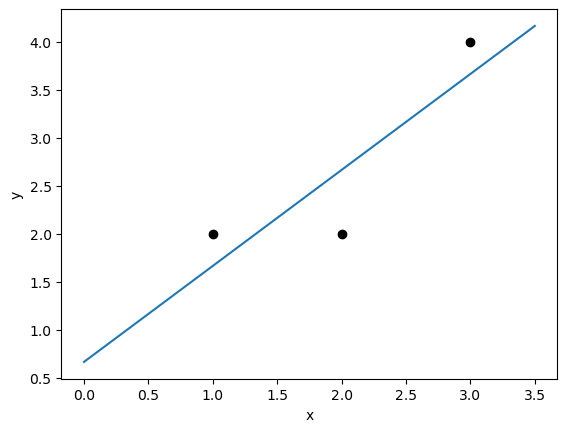

In [42]:
#beta 1 > 0 which is reasonable given the data.  the best fit line should have a positive slope.
f = lambda x : beta0 + beta1*x
xfit = np.arange(0, 4, .5)
yfit = f(xfit)
print(xfit,'=',yfit)
plt.plot(x_train, y_train, 'ko', xfit, yfit)
# plt.plot(xfit, yfit, 'ko')
plt.xlabel('x')
plt.ylabel('y')

### Building a model with statsmodel and sklearn

Now that we can concretely fit the training data from scratch, let's learn two Python packages to do it all for us: [statsmodels](http://www.statsmodels.org/stable/regression.html) and [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from statsmodel and sklearn to the $\beta$ values that we found from above from scratch.

For the purposes of this lab, statsmodels and sklearn do the same thing.  More generally though, statsmodels tends to be easier for inference, whereas sklearn has machine-learning algorithms and is better for prediction.  

**Below is the code for statsmodels.**  Statsmodels does not by default include the column of ones in the $X$ matrix, so we include it with `sm.add_constant`.

## The Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector, as outlined earlier in this chapter.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

In [43]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
#create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)
#this is the same matrix as in our scratch problem!
print(X)
#build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)
#save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()
#pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
(beta0, beta1) = (0.666667, 1.000000)


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.  Type `results_sm.` and hit tab to see.

**Below is the code for sklearn.**

In [44]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
x_train = x_train.reshape(len(x_train),1)
# x_train = x_train[:, np.newaxis]
y_train = y_train.reshape(len(y_train),1)
#build the least squares model
toyregr_skl = linear_model.LinearRegression()
#save regression info (parameters, etc) in results_skl
results_skl = toyregr_skl.fit(x_train,y_train)
#pull the beta parameters out from results_skl
beta0_skl = results_skl.intercept_
beta1_skl = results_skl.coef_[0]

print("(beta0, beta1) = (%f, %f)" %(beta0_skl, beta1_skl))

(beta0, beta1) = (0.666667, 1.000000)


### Building Model from Scratch 02
#### Supervised Learning Example: Simple Linear Regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example (see the following figure):

RandomState(MT19937) [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]


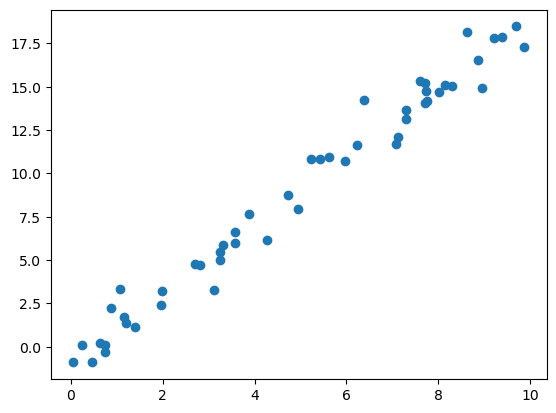

In [52]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
print(rng, rng.rand(50))
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50) # rng.randn(50) added to scatter the points
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### Arrange data into a features matrix and target vector

Previously we examined the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [64]:
# X = x[:, np.newaxis]
X = x.reshape(len(x),1)
print(X.shape)

Y = y.reshape(len(y),1)
model.fit(X, y) # if y reshape to be reshaped, then there will be 2D array of coef_
print(model.coef_, model.intercept_)

model.fit(X, Y)
print(model.coef_, model.intercept_)

(50, 1)
[1.9754062] -0.8592178597201698
[[1.9754062]] [-0.85921786]


#### Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the `predict` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

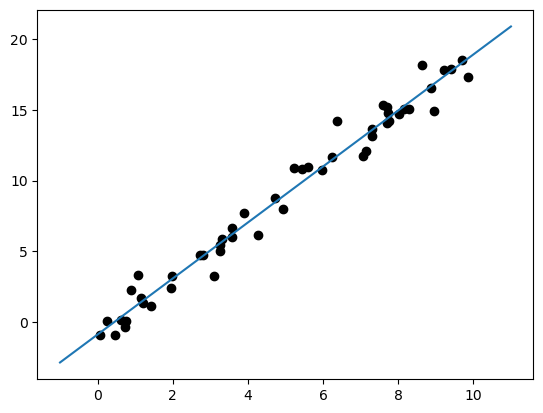

In [71]:
# in hand model
# f = lambda x : beta0 + beta1*x
# xfit = np.arange(0, 4, .5)
# yfit = f(xfit)

xfit = np.linspace(-1, 11)
# np.linspace(start, stop) creates an array of numbers starting from start to stop, with 50 elements by default.
Xfit = xfit[:, np.newaxis] # or use reshape
# print(Xfit.shape, Xfit)
yfit = model.predict(Xfit)

# plt.scatter(x, y)
# plt.plot(xfit, yfit)
plt.plot(x, y, 'ko', xfit, yfit)

## Part 2: Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [73]:
#load mtcars
cars_data = pd.read_csv("data/mtcars.csv")
cars_data = cars_data.rename(columns={"Unnamed: 0":"name"})
cars_data.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [74]:
#split into training set and testing set
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
train_data, test_data = train_test_split(cars_data, test_size = 0.3, random_state = 6)
train_data

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


> **EXERCISE:** Go to the documentation of sklearn train_test_split. Read and explain what the parameters do. 

In [75]:
#testing set is ~30% of the total data; training set is ~70%
cars_data.shape, train_data.shape, test_data.shape

((32, 12), (22, 12), (10, 12))

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using simple linear regression.  Use the model to make mpg predictions on testing set.  

> Plot the data and the prediction.  

>Print out the mean squared error for the training set and the testing set and compare.

In [76]:
#define  predictor and response for training set
y_train = train_data.mpg
x_train = train_data[['wt']]

# define predictor and response for testing set
y_test = test_data.mpg
x_test = test_data[['wt']]

In [77]:
# create linear regression object with sklearn
regr = linear_model.LinearRegression()

# train the model and make predictions
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
#print out coefficients
print('Coefficients: \n', regr.coef_[0], regr.intercept_)

Coefficients: 
 -5.252574103908987 37.77785841313509


Text(0, 0.5, 'mpg')

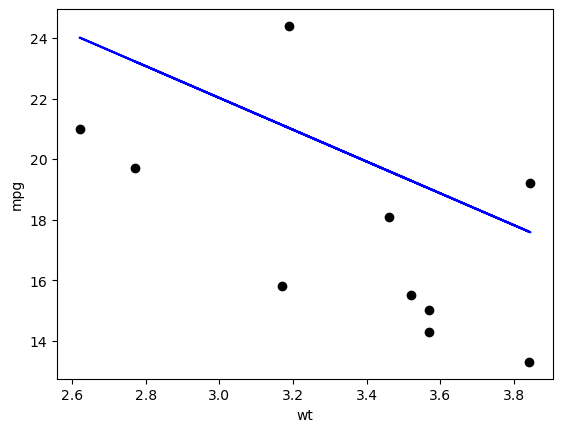

In [78]:
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue")
plt.xlabel('wt')
plt.ylabel('mpg')

In [79]:
train_MSE2= np.mean((y_train - regr.predict(x_train))**2)
test_MSE2= np.mean((y_test - regr.predict(x_test))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))

# or with sklearn.metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, regr.predict(x_train)))
print(mean_squared_error(y_test, regr.predict(x_test)))
regr.predict(x_train)**2

The training MSE is 7.308504, the testing MSE is 13.767534
7.308504114538138
13.76753382764602


array([687.60353078, 791.82498438, 654.94465422, 450.80843946,
       858.19416788, 388.44481879, 104.0776285 , 330.72175787,
       389.48073855, 762.54003881, 704.23093604, 268.95612339,
       514.23307957,  94.14529478, 889.87148545,  86.2650209 ,
       321.23852807, 537.11318193, 616.54197292, 436.42688961,
       388.44481879, 388.44481879])

## Part 3: Multiple linear regression with automobile data

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions on testing set.  Print out the mean squared error for the training set and the testing set and compare.  

>How do these training and testing mean squared errors compare to those from the simple linear regression?

>Repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [80]:
x_train2 = train_data[['wt', 'hp']]
x_test2 = test_data[['wt', 'hp']]

#create linear regression object with sklearn
regr2 = linear_model.LinearRegression()

#train the model 
regr2.fit(x_train2, y_train)

#make predictions using the testing set
y_pred2 = regr2.predict(x_test2)

#coefficients
print('Coefficients: \n', regr.coef_[0], regr.intercept_)

train_MSE2= np.mean((y_train - regr2.predict(x_train2))**2)
test_MSE2= np.mean((y_test - regr2.predict(x_test2))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))

print(mean_squared_error(y_train, regr2.predict(x_train2)))
print(mean_squared_error(y_test, regr2.predict(x_test2)))

##or using statsmodels
#Y = y_train
#X = x_train
#X = sm.add_constant(X)
#model = sm.OLS(Y,X)
#results = model.fit()
#print('Parameters: ', results.params)
#print('R2: ', results.rsquared)

Coefficients: 
 -5.252574103908987 37.77785841313509
The training MSE is 6.869723, the testing MSE is 4.659417
6.869722562770145
4.659417453818462


## Part 4: Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented.
The best way to think about data within Scikit-Learn is in terms of *tables*.

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [81]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

### The Features Matrix

The table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this matrix is often stored in a variable named `X`.
The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are often real-valued, but may be Boolean or discrete-valued in some cases.

### The Target Array

In addition to the feature matrix `X`, we also generally work with a *label* or *target* array, which by convention we will usually call `y`.
The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `[n_samples, n_targets]` target array, we will primarily be working with the common case of a one-dimensional target array.

A common point of confusion is how the target array differs from the other feature columns. The distinguishing characteristic of the target array is that it is usually the quantity we want to *predict from the features*: in statistical terms, it is the dependent variable.
For example, given the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the `species` column would be considered the target array.

With this target array in mind, we can use Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data (see the following figure):

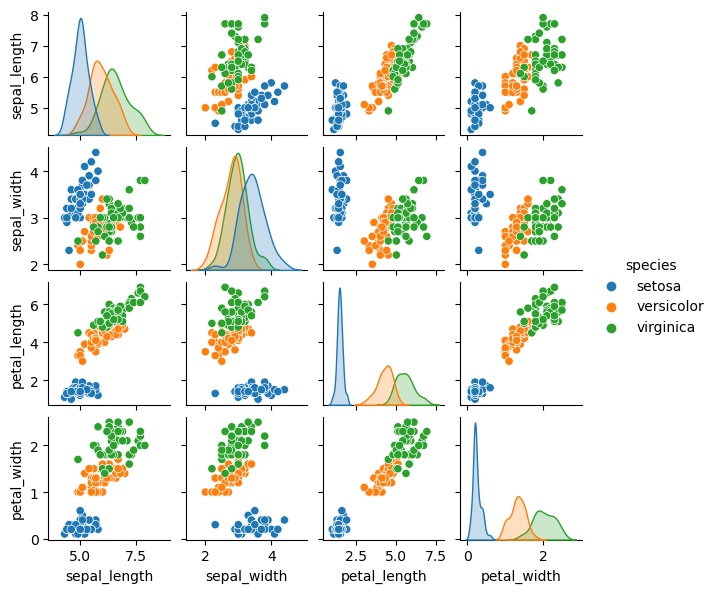

In [82]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb):

In [83]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [84]:
y_iris = iris['species']
y_iris.shape

(150,)